In [1]:
# importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
import keras
import tensorflow

#### Data Simulation

In [2]:
# Generating IoT dataset using 'faker'
from faker import Faker
from datetime import datetime, timedelta
fake = Faker()
def generate_iot_data(num_records=20000):
    data={
        "sensor_id": [f"sensor_{i}" for i in range(1, num_records+1)],
        "location": [fake.city() for _ in range(num_records)],
        "user_name": [fake.name() for _ in range(num_records)],
        "temperature_c": np.random.normal(22, 3, num_records),       # room temperature
        "humidity_pct": np.random.normal(50, 10, num_records),       # humidity %
        "light_level_lux": np.random.uniform(100, 1000, num_records),# light intensity
        "motion_detected": np.random.choice([0,1], num_records, p=[0.9,0.1]), # motion flag
        "battery_level_pct": np.random.uniform(20,100,num_records),  # battery %
        "event_time": [datetime.now() + timedelta(seconds=i) for i in range(num_records)]
    }
    df = pd.DataFrame(data)
    return df
df = generate_iot_data(20000)
df.to_csv("datas/iot_data.csv", index=False)
df.head(100)

,sensor_id,location,user_name,temperature_c,humidity_pct,light_level_lux,motion_detected,battery_level_pct,event_time
0,sensor_1,Schultzton,Michael Cardenas,21.044260,36.900202,171.924699,0,92.695418,2025-10-13 21:35:31.273412
1,sensor_2,North Samuel,Matthew Gray,23.348362,46.546817,524.063840,0,96.172107,2025-10-13 21:35:32.273429
2,sensor_3,Katherinetown,Maria Pratt,25.172105,64.640064,744.696778,0,73.604978,2025-10-13 21:35:33.273433
3,sensor_4,East Kimberly,Christopher Bowman,26.824457,35.311802,551.514394,1,89.765535,2025-10-13 21:35:34.273434
4,sensor_5,Hunterport,Donna Landry,25.986291,36.319564,973.315656,0,74.496654,2025-10-13 21:35:35.273435
...,...,...,...,...,...,...,...,...,...
95,sensor_96,New Jessicaton,Marcus Wright,25.318873,63.356729,963.489202,0,24.990233,2025-10-13 21:37:06.273571
96,sensor_97,Jesusshire,Eric Cowan,27.198730,53.658535,332.383085,0,26.165373,2025-10-13 21:37:07.273573
97,sensor_98,West Vincent,Alicia Warner,22.531829,50.015826,805.928956,0,67.606272,2025-10-13 21:37:08.273575
98,sensor_99,East Jameshaven,Thomas Jimenez,26.391492,55.021901,134.172089,0,24.499427,2025-10-13 21:37:09.273576


#### Data Encryption or Hashing

In [3]:
# Encryption key
from cryptography.fernet import Fernet
key = Fernet.generate_key()
fernet = Fernet(key)

def encrypt_value(val: str) -> str:
    return fernet.encrypt(val.encode()).decode()
def hash_value(val: str) -> str:
    return hashlib.sha256(val.encode()).hexdigest()

df['location_encrypted'] = df['location'].apply(encrypt_value)
df['user_name_hashed'] = df['user_name'].apply(hash_value)

df = df.drop(['location', 'user_name'], axis=1)
df.to_csv("datas/encrypted_iot_data.csv", index=False)
df.head(100)

,sensor_id,temperature_c,humidity_pct,light_level_lux,motion_detected,battery_level_pct,event_time,location_encrypted,user_name_hashed
0,sensor_1,21.044260,36.900202,171.924699,0,92.695418,2025-10-13 21:35:31.273412,gAAAAABo7SNUHfRL37c4nh8N7a8GdHZnncTTNMdoYoFXv8...,dbf539a2bfa08f84f1dfafc93c644d084a08329e760708...
1,sensor_2,23.348362,46.546817,524.063840,0,96.172107,2025-10-13 21:35:32.273429,gAAAAABo7SNU3ajeVgf_soIuJwymEavhGGlAk9xLWPDgUe...,b3950b0166e03527bc68f21ea1dc9faf27bc3bf140532d...
2,sensor_3,25.172105,64.640064,744.696778,0,73.604978,2025-10-13 21:35:33.273433,gAAAAABo7SNU60Ck5KQP6sz-Gtb3IR9qlZRQGFUBnkx-Ce...,7e4aa248cecd5948bf334edc60622bdac6a1d15d763450...
3,sensor_4,26.824457,35.311802,551.514394,1,89.765535,2025-10-13 21:35:34.273434,gAAAAABo7SNU6B0c9sUPEMZejk1Jd7j7N0eQV0Z8KIlkpg...,ec8f576b6b7f8f73f2fdb3ff7926136313b6ff39a9ff2d...
4,sensor_5,25.986291,36.319564,973.315656,0,74.496654,2025-10-13 21:35:35.273435,gAAAAABo7SNUo21I5RV4xmuwzp6fPdMesPoaEU7aaYjCSd...,893895d5e52c43b9a782a2724a30bd7ab627584d0882df...
...,...,...,...,...,...,...,...,...,...
95,sensor_96,25.318873,63.356729,963.489202,0,24.990233,2025-10-13 21:37:06.273571,gAAAAABo7SNU_ly-GLY6OFYxIrfkNdo3InGaVtEP-1SAct...,81a7d67e32b4cdf51a999c2c740b3f4a55a6e272ead4f9...
96,sensor_97,27.198730,53.658535,332.383085,0,26.165373,2025-10-13 21:37:07.273573,gAAAAABo7SNU-RDcgq2gNuaYgLMZ2g5reXKQTqxw3scJdq...,038cb88a52465c03650d6de4399ccfdda0b999950c7499...
97,sensor_98,22.531829,50.015826,805.928956,0,67.606272,2025-10-13 21:37:08.273575,gAAAAABo7SNUHJWOLfTUJqClCdxD9-3hy-o38ZPN7SGVlJ...,53588e0373e244a359eafb1c20e9bdb01c79b366443520...
98,sensor_99,26.391492,55.021901,134.172089,0,24.499427,2025-10-13 21:37:09.273576,gAAAAABo7SNUNHtvksA8FJD_NQ8npJkDgm5v57xPNQaoaH...,0062aa18aae5300bbd5bb28964467690c4ae09df4b7656...


#### Standardising data for ANN model

In [4]:
# Preparing data for ANN

# Selecting numeric features
features = ["temperature_c","humidity_pct","light_level_lux","battery_level_pct","motion_detected"]
x = df[features].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#### ANN model

In [5]:
# Building ANN model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(25, input_dim = 5, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(5, activation='linear'))

model.compile(Adam(learning_rate=0.01), loss="mse", metrics=['accuracy'])

model.summary()

c:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 35)             │         1,085 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,840 (11.09 KB)

 Trainable params: 2,840 (11.09 KB)

 Non-trainable params: 0 (0.00 B)

#### Training model

In [6]:
# Train model

model.fit(x_scaled, x_scaled, epochs=20, batch_size=256, validation_split=0.1, verbose=1)

Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8713 - loss: 0.1215 - val_accuracy: 0.9645 - val_loss: 0.0054
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9714 - loss: 0.0040 - val_accuracy: 0.9780 - val_loss: 0.0033
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9767 - loss: 0.0025 - val_accuracy: 0.9735 - val_loss: 0.0022
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9783 - loss: 0.0022 - val_accuracy: 0.9830 - val_loss: 0.0015
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9825 - loss: 0.0012 - val_accuracy: 0.9800 - val_loss: 0.0013
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9824 - loss: 0.0014 - val_accuracy: 0.9845 - val_loss: 8.9808e-04
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9825 - loss: 0.0012 - val_accuracy: 0.9845 - val_loss: 9.4431e-04
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9882 - loss: 6.3633e-04 - val_accuracy: 0.9920

#### Detecting anomalous datas

In [7]:
# Detect Anomalies

x_pred = model.predict(x_scaled)   # reconstruct input data using trained model
mse = np.mean(np.power(x_scaled - x_pred, 2), axis=1)    # mse calculates how reconstructed data differ from original
df["reconstruction_error"] = mse 

threshold = np.percentile(mse, 99)          # It pick a cutoff value — here, the top 1% highest errors.
df["anomaly"] = (df["reconstruction_error"] > threshold).astype(int)   # Marks rows with large reconstruction error as anomalies (1), others as normal (0).

print(df[df['anomaly'] == 1].head(100))
df.to_csv("datas/anomaly_results.csv", index=False)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
        sensor_id  temperature_c  humidity_pct  light_level_lux  \
3        sensor_4      26.824457     35.311802       551.514394   
36      sensor_37      26.353788     44.275433       963.781221   
91      sensor_92      19.080519     28.573231       767.824461   
174    sensor_175      17.987873     50.530914       869.406322   
369    sensor_370      24.235725     76.929882       103.328366   
...           ...            ...           ...              ...   
8797  sensor_8798      18.089073     33.994626       725.385730   
8800  sensor_8801      23.067883     22.418543       551.005757   
8822  sensor_8823      24.688874     48.665235       858.174205   
8866  sensor_8867      13.793902     49.707654       504.378705   
8894  sensor_8895      22.387949     36.634634       728.398117   

      motion_detected  battery_level_pct                 event_time  \
3                   1          89.765535 2025-10-13 21:35:34.273434   
36          

#### Data Visualization

##### Plot-1: Pairplot-IoT sensor feature relationships with anomalies

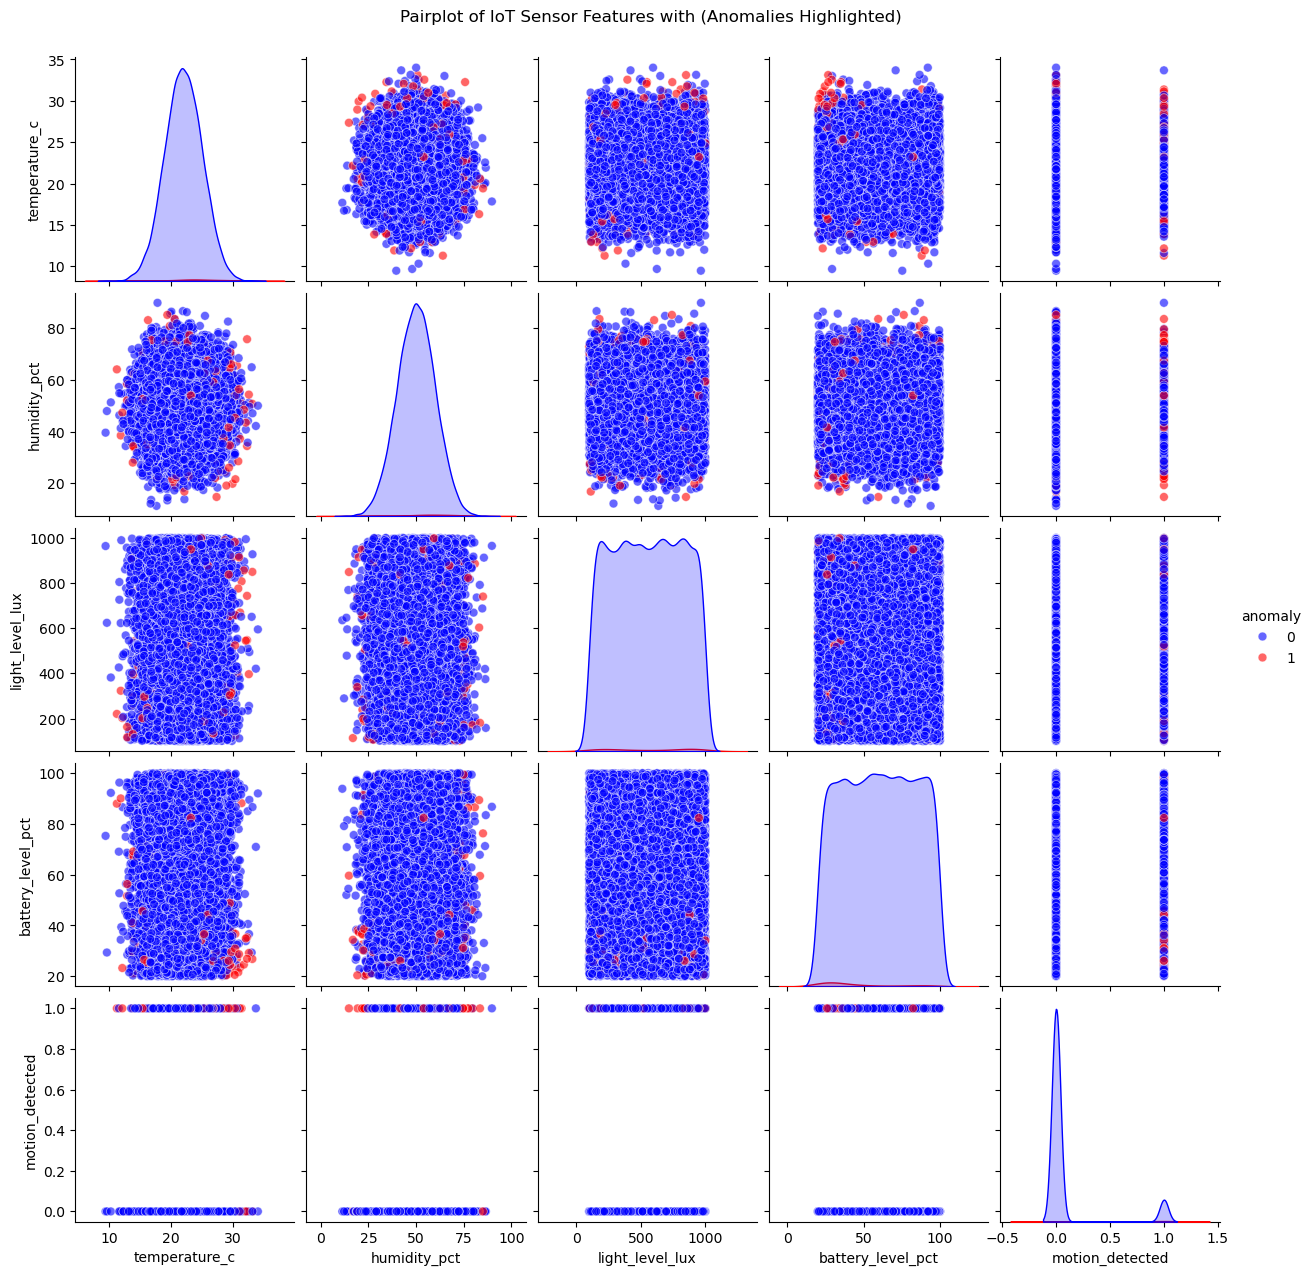

In [118]:
numeric_cols = ["temperature_c","humidity_pct","light_level_lux","battery_level_pct","motion_detected"]

sns.pairplot(df[numeric_cols + ['anomaly']], hue='anomaly', palette={0: 'blue', 1: 'red'}, plot_kws={'alpha':0.6, 's':40})
plt.suptitle('Pairplot of IoT Sensor Features with (Anomalies Highlighted)', y=1.02)
plt.savefig("plots/pairplot_iot_features.png", dpi=300, bbox_inches='tight')
plt.show()

##### Plot-2: Scatterplot- Anomalies in Temperature vs Humidity

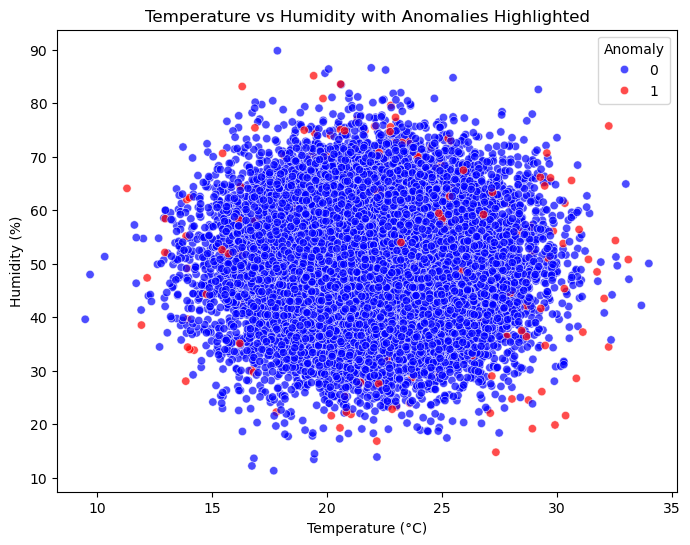

In [119]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="temperature_c", y="humidity_pct", hue="anomaly",
                palette={0: "blue", 1: "red"}, alpha=0.7)
plt.title("Temperature vs Humidity with Anomalies Highlighted")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.legend(title="Anomaly")
plt.savefig("plots/scatterplot_temp_humid_anomaly.png", dpi=300, bbox_inches='tight')
plt.show()

##### Plot-3: Histogram - Reconstruction Error Distribution

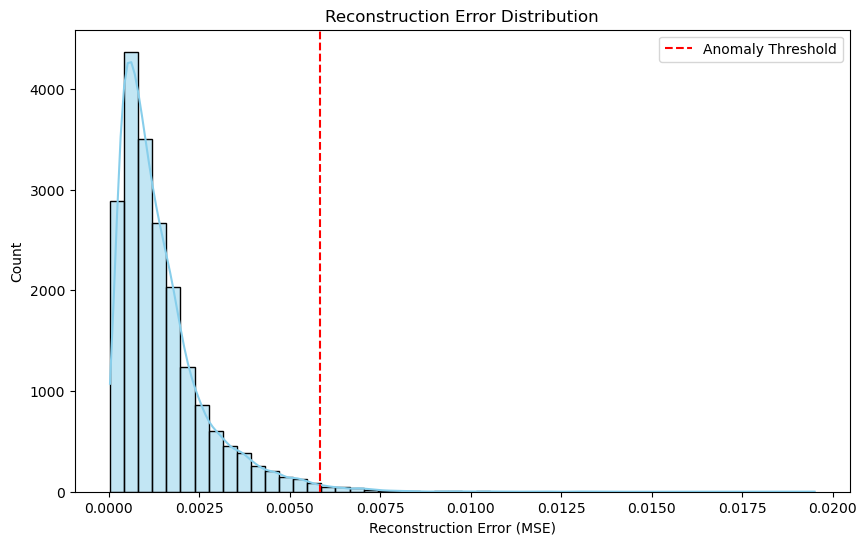

In [120]:
plt.figure(figsize=(10,6))
sns.histplot(df["reconstruction_error"], bins=50, kde=True, color='skyblue')
threshold = df["reconstruction_error"].quantile(0.99)
plt.axvline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Count")
plt.legend()
plt.savefig("plots/reconstruction_error", dpi=300, bbox_inches='tight')
plt.show()

##### Plot-4: Correlation Heatmap

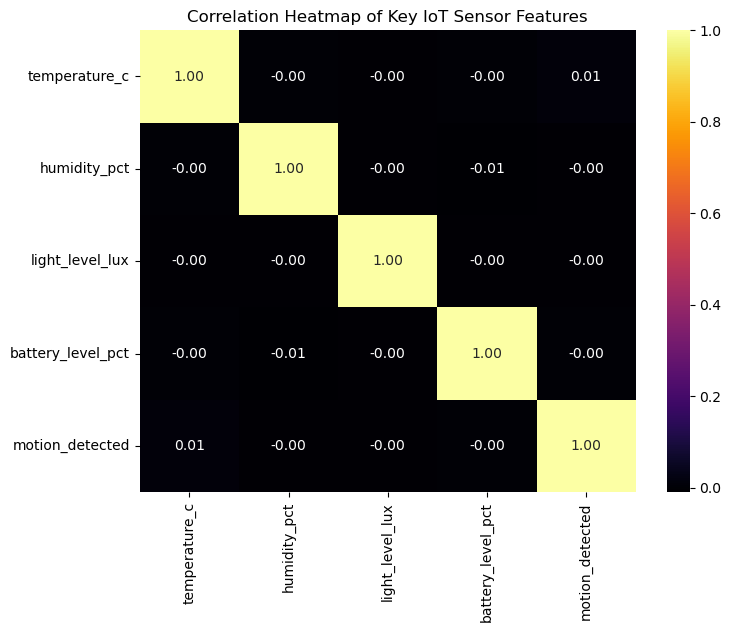

In [121]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="inferno", fmt=".2f")
plt.title("Correlation Heatmap of Key IoT Sensor Features")
plt.savefig("plots/corr_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()